# Кластеризация данных

Хотелось бы начать с того, а что такое **кластеризация**.
Кластеризация - это процесс разделения набора данных на группы, называемые **кластерами**.
Целью кластеризации данных является выявление внутренней структуры набора данных, выделение скрытых закономерностей и группировка данных схожих объектов вместе.

Кластеризация служит нескольким важным целям в анализе данных:

- **Упрощение анализа сложных данных**:
Помогает упростить и обобщить данные, выделив из них более однородные группы. Это делает анализ данных более управляемым и понятным.
- **Выделение скрытых закономерностей**:
Может выявлять природные группы объектов, которые сложно увидеть визуально или с помощью простого статистического анализа.
- **Сегментация**:
Кластеризация используется для **[сегментации данных](https://gopractice.ru/data/segmentation/)** в маркетинге, медицинских исследованиях, биологии и других областях.
В маркетинге потребителей можно разделить на сегменты по схожим предпочтениям и поведению, что позволяет более точно таргетировать рекламу и предложения.
- **Улучшение эффективности алгоритмов**:
Группировка данных может улучшить производительность и точность других алгоритмов машинного обучения и обработки данных, например, при классификации или подборе рекомендаций.
- **Оценка и отбор характеристик**:
Кластеризация помогает в идентификации и оценке значимых характеристик, на основании которых строится дальнейший анализ.

### Виды кластеризации
Кластеризация делится на разные группы, такие как на этом рисунке

![Roadmap](clusterization.png "Типы кластеризации")

В данной работе, я приведу сравнение двух алгоритмов кластеризации: **K-Means** и **Mean-Shift**.

# Кластеризация моделей телефона

Я хочу кластеризовать телефоны, для определения их в группы (очень дорогой, дорогой, средний, дешевый) по стоимости относительно ключевых значений


In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('phones_2024.csv')
df.head(10)

,Unnamed: 0,Model,Price,Rating,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
0,0,iQOO Z9 5G,"₹19,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7200, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 44W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v14
1,1,Nothing Phone 2a,"₹23,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 7200 Pro, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,Android v14,No FM Radio
2,2,Vivo V30 Pro 5G,"₹41,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,Memory Card Not Supported,Android v14
3,3,Vivo V30 5G,"₹33,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 7 Gen3, Octa Core, 2.63 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 50 MP Front Camera,Memory Card Supported,Android v14
4,4,Realme 12 Plus 5G,"₹19,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 2 TB",Android v14
5,5,Oppo F25 Pro 5G,"₹23,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,"Memory Card (Hybrid), upto 2 TB",Android v14
6,6,Samsung Galaxy F15 5G,"₹12,999",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6100 Plus, Octa Core, 2.2 GHz Processor","4 GB RAM, 128 GB inbuilt",6000 mAh Battery with 25W Fast Charging,"6.45 inches, 1080 x 2340 px, 90 Hz Display wit...",50 MP + 5 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v14
7,7,OnePlus Nord CE 3 5G,"₹22,429",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 782G, Octa Core, 2.7 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v13
8,8,Xiaomi Redmi Note 13 Pro 5G,"₹23,630",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Snapdragon 7s Gen 2, Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",5100 mAh Battery with 67W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,No FM Radio
9,9,Motorola Moto G34 5G (8GB RAM + 128GB),"₹11,999",77.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.5 inches, 720 x 1600 px, 120 Hz Display with...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v14


### Предобработка данных

Просмотрев данные мы видим, что:
- Все цены указаны в [рупиях](https://www.google.com/search?q=%D0%BA%D1%83%D1%80%D1%81+%D1%80%D1%83%D0%BF%D0%B8%D0%B9+%D0%BA+%D1%80%D1%83%D0%B1%D0%BB%D1%8E&oq=%D0%BA%D1%83%D1%80%D1%81+%D1%80%D1%83%D0%BF%D0%B8%D0%B9+&gs_lcrp=EgZjaHJvbWUqBwgBEAAYgAQyBggAEEUYOTIHCAEQABiABDIHCAIQABiABDIHCAMQABiABDIHCAQQABiABDIHCAUQABiABDIHCAYQABiABDIHCAcQABiABDIHCAgQABiABDIHCAkQABiABNIBCDI2NThqMGo3qAIIsAIB&sourceid=chrome&ie=UTF-8)
- Характеристики телефонов хранятся совместно
- Память телефонов необходимо перевести в КБ для удобной работы с данными

In [3]:
def rupee_to_rubles(x):
    price = int(''.join(re.findall('\d', x)))
    return price * 1.11

df['Price'] = df['Price'].apply(rupee_to_rubles).astype(dtype='int')
df

,Unnamed: 0,Model,Price,Rating,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
0,0,iQOO Z9 5G,22198,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7200, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 44W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v14
1,1,Nothing Phone 2a,26638,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 7200 Pro, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,Android v14,No FM Radio
2,2,Vivo V30 Pro 5G,46618,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,Memory Card Not Supported,Android v14
3,3,Vivo V30 5G,37738,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 7 Gen3, Octa Core, 2.63 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 50 MP Front Camera,Memory Card Supported,Android v14
4,4,Realme 12 Plus 5G,22198,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 2 TB",Android v14
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1015,GFive Z9 New,737,NaN,Dual Sim,No Wifi,1.2 MHz Processor,"32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 320 x 480 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 16 GB"
1016,1016,itel Ace 2 Heera,947,NaN,Dual Sim,"Single Core, 208 MHz Processor","32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 120 x 240 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth
1017,1017,Karbonn ‎KX11I,997,NaN,Dual Sim,"32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Symbian v9.3,Bluetooth
1018,1018,MTR Fold Z,1776,NaN,Dual Sim,256 MHz Processor,"32 MB RAM, 32 MB inbuilt",2000 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,Memory Card Supported,No FM Radio


In [4]:
def split_specification(x):
    a = list(map(str.strip, x.split(',')))
    return pd.Series({
        'NFC': True if 'NFC' in a else False,
        '5G': True if '5G' in a else False
    })

new_specs: pd.Series = df['Specification'].apply(split_specification)
df = pd.concat([df, new_specs], axis='columns')
df

,Unnamed: 0,Model,Price,Rating,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem,NFC,5G
0,0,iQOO Z9 5G,22198,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7200, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 44W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v14,False,True
1,1,Nothing Phone 2a,26638,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 7200 Pro, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,Android v14,No FM Radio,True,True
2,2,Vivo V30 Pro 5G,46618,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,Memory Card Not Supported,Android v14,False,True
3,3,Vivo V30 5G,37738,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 7 Gen3, Octa Core, 2.63 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 50 MP Front Camera,Memory Card Supported,Android v14,False,True
4,4,Realme 12 Plus 5G,22198,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 2 TB",Android v14,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1015,GFive Z9 New,737,NaN,Dual Sim,No Wifi,1.2 MHz Processor,"32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 320 x 480 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 16 GB",False,False
1016,1016,itel Ace 2 Heera,947,NaN,Dual Sim,"Single Core, 208 MHz Processor","32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 120 x 240 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,False,False
1017,1017,Karbonn ‎KX11I,997,NaN,Dual Sim,"32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Symbian v9.3,Bluetooth,False,False
1018,1018,MTR Fold Z,1776,NaN,Dual Sim,256 MHz Processor,"32 MB RAM, 32 MB inbuilt",2000 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,Memory Card Supported,No FM Radio,False,False


In [5]:
def clear_memory(x):
    x = x.replace(' ', ' ')
    ram = re.findall('(\d+ GB|MB) RAM', x)
    rom = re.findall('(\d+ (TB|GB|MB)) inbuilt', x)

    memory = {'TB': 1024 * 1024, 'GB': 1024, 'MB': 1}

    try:
        ram = ram[0].split(' ')
        ram_memory, memory_type = int(ram[0]), memory[ram[1]]
        ram = ram_memory * memory_type
    except (IndexError, ValueError):
        ram = np.nan

    try:
        rom = rom[0][0].split(' ')
        rom_memory, memory_type = int(rom[0]), memory[rom[1]]
        rom = rom_memory * memory_type
    except (IndexError, ValueError):
        rom = np.nan

    return pd.Series({'RAM': ram, 'ROM': rom}).fillna(0).astype(int)

new_memory = df['RAM'].apply(clear_memory)
df.drop('RAM', axis='columns', inplace=True)
df = pd.concat([df, new_memory], axis='columns')
df

,Unnamed: 0,Model,Price,Rating,Specification,Processor,Battery,Display,Camera,Memory,OperatingSystem,NFC,5G,RAM,ROM
0,0,iQOO Z9 5G,22198,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7200, Octa Core, 2.8 GHz Processor",5000 mAh Battery with 44W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v14,False,True,8192,131072
1,1,Nothing Phone 2a,26638,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 7200 Pro, Octa Core, 2.8 GHz Processor",5000 mAh Battery with 45W Fast Charging,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,Android v14,No FM Radio,True,True,8192,131072
2,2,Vivo V30 Pro 5G,46618,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 8200, Octa Core, 3.1 GHz Processor",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,Memory Card Not Supported,Android v14,False,True,8192,262144
3,3,Vivo V30 5G,37738,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 7 Gen3, Octa Core, 2.63 GHz Processor",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 50 MP Front Camera,Memory Card Supported,Android v14,False,True,8192,131072
4,4,Realme 12 Plus 5G,22198,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 2 TB",Android v14,False,True,8192,131072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1015,GFive Z9 New,737,NaN,Dual Sim,No Wifi,"32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 320 x 480 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 16 GB",False,False,0,0
1016,1016,itel Ace 2 Heera,947,NaN,Dual Sim,"Single Core, 208 MHz Processor",1000 mAh Battery,"1.8 inches, 120 x 240 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,False,False,0,32
1017,1017,Karbonn ‎KX11I,997,NaN,Dual Sim,"32 MB RAM, 32 MB inbuilt","1.8 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Symbian v9.3,Bluetooth,False,False,0,0
1018,1018,MTR Fold Z,1776,NaN,Dual Sim,256 MHz Processor,2000 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,Memory Card Supported,No FM Radio,False,False,0,32


In [6]:
data = pd.DataFrame({
    'Model': df['Model'],
    'Price': df['Price'],
    'RAM': df['RAM'],
    'ROM': df['ROM'],
    'NFC': df['NFC'],
    '5G': df['5G']
})
data

,Model,Price,RAM,ROM,NFC,5G
0,iQOO Z9 5G,22198,8192,131072,False,True
1,Nothing Phone 2a,26638,8192,131072,True,True
2,Vivo V30 Pro 5G,46618,8192,262144,False,True
3,Vivo V30 5G,37738,8192,131072,False,True
4,Realme 12 Plus 5G,22198,8192,131072,False,True
...,...,...,...,...,...,...
1015,GFive Z9 New,737,0,0,False,False
1016,itel Ace 2 Heera,947,0,32,False,False
1017,Karbonn ‎KX11I,997,0,0,False,False
1018,MTR Fold Z,1776,0,32,False,False


In [42]:
from sklearn import preprocessing


norm_df = pd.DataFrame({
    'RAM': df['RAM'],
    'ROM': df['ROM'],
    'NFC': df['NFC'],
    '5G': df['5G']
})
x = norm_df.values
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_df = pd.DataFrame(x_scaled)
norm_df.columns = ['RAM', 'ROM', 'NFC', '5G']
norm_df

,RAM,ROM,NFC,5G
0,0.641461,-0.053758,-0.603023,1.058576
1,0.641461,-0.053758,1.658312,1.058576
2,0.641461,1.021714,-0.603023,1.058576
3,0.641461,-0.053758,-0.603023,1.058576
4,0.641461,-0.053758,-0.603023,1.058576
...,...,...,...,...
1015,-1.731305,-1.129230,-0.603023,-0.944666
1016,-1.731305,-1.128967,-0.603023,-0.944666
1017,-1.731305,-1.129230,-0.603023,-0.944666
1018,-1.731305,-1.128967,-0.603023,-0.944666


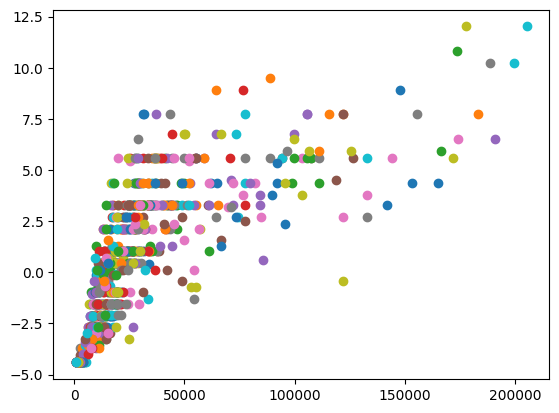

In [43]:
import matplotlib.pyplot as plt

for price, ram, rom, nfc, internet in zip(data['Price'], norm_df['RAM'], norm_df['ROM'], norm_df['NFC'], norm_df['5G']):
    plt.scatter(price, ram + rom + nfc + internet)


plt.show()

In [44]:
from sklearn.cluster import KMeans, MeanShift, OPTICS

X = pd.DataFrame({
    'Price': data['Price'],
    'Score': norm_df.sum(axis=1, numeric_only=True)
})

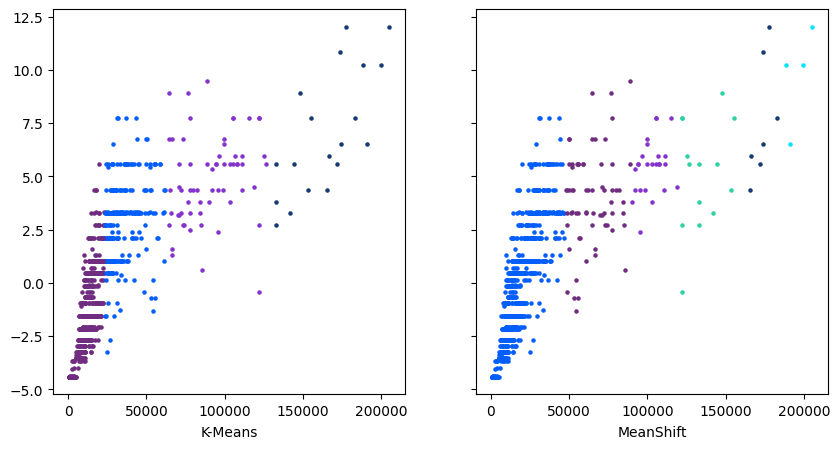

In [46]:
colours = {0: '#035efc', 1: '#702d80', 2: '#8533cc', 3: '#173a73', 4: '#2ed1a3', 5: '#03e3fc', 6: '#4287f5'}
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10, 5))

clust = KMeans(n_clusters=4).fit(X)
results = pd.DataFrame(data=clust.labels_, columns=['cluster'])
kmeans_data = pd.concat([X, results], axis='columns')

clust = MeanShift().fit(X)
results = pd.DataFrame(data=clust.labels_, columns=['cluster'])
minishift_data = pd.concat([X, results], axis='columns')

for price, score, c in zip(kmeans_data['Price'], kmeans_data['Score'], kmeans_data['cluster']):
    axs[0].scatter(price, score, c=colours[c], s=5)

for price, score, c in zip(minishift_data['Price'], minishift_data['Score'], minishift_data['cluster']):
    axs[1].scatter(price, score, c=colours[c], s=5)

axs[0].set_xlabel('K-Means', labelpad=5)
axs[1].set_xlabel('MeanShift', labelpad=5)

plt.show()